# 3. Analyzing Issue Scales

# Contents

* 3.1 Aldrich-McKelveyScaling
* 3.2 Basic Space Scaling: The blackbox Function
* 3.3 Basic Space Scaling: The blackbox transpose Function
* 3.4 AnchoringVignettes
* 3.5 Conclusion

#### issue scales

* Public opinion surveys often ask respondents to place themselves and political parties, candidates, and public figures on issue scales. 
* Some issue scales have labeled endpoints such as “strongly agree” and “strongly disagree.”
* Likert-type questions or items.

#### ANSE

* For example, in every presidential election year since 1972, the American National Election Study (ANES) has included a seven-point “guaranteed jobs”
* Another scale often used in public opinion surveys asks respondents to place themselves, the parties, and candidates on the liberal-conservative spectrum. The ANES version of this question is: 
    - “We hear a lot of talk these days about liberals and conservatives. 
    - Here is a 7-point scale on which the political views that people might hold are arranged from extremely liberal to extremely conservative.” 
        - The endpoints are labeled “extremely liberal” (1) and 
        - “extremely conservative” (7).

#### scales

* Issue scales are often combined into 
    - Likert scales and 
    - Guttman scales.
* Item Response Theory (IRT) model
    - The classical Item Response Theory (IRT) model 
        - used in skills-based test 
        - is a cumulative scaling model and 
        - inconsistent with Coombs’s (1964) unfolding model, 
            - which treats individuals as having 
                - ideal points and 
                - single-peaked preference functions.
     - Bayesian IRT
* Aldrich-McKelvey scaling
* Blackbox scaling
* Blackbox transpose scaling.

# 3.1 Aldrich-McKelvey Scaling

* 3.1.1 The basicspace Package in R
* 3.1.2 Example 1: 2009 European Election Study (French Module)
* 3.1.3 Example 2: 1968 American National Election Study Urban Unrest and Vietnam War Scales
* 3.1.4 Estimating Bootstrapped Standard Errors for Aldrich-McKelveyScaling
* 3.1.5 Bayesian Aldrich-McKelvey Scaling
* 3.1.6 Comparing Aldrich-McKelvey Standard Errors

#### differential item-functioning(DIF)

* Issue scales are well-suited for the application of spatial models, but they nonetheless present a formidable methodological difficulty. 
* Namely, respondents may interpret the meaning of the scale differently—a problem that has come to be known as “interpersonal incomparability” or “differential item-functioning” (DIF) in the literature (Brady, 1985; King et al., 2004). 
* DIF can stem from several sources.

#### Aldrich-McKelvey (A-M) scaling

* Aldrich and McKelvey’s (1977) insight was that even though survey respon- dents distort their placement of political stimuli, they typically nonetheless perceive and report an accurate ordering of the stimuli.

* Responses to issue scales, then, can be understood as a linear transformation of the true locations of political stimuli along a latent dimension, plus random noise, u_ij, which satisfies the Gauss-Markov assumptions of zero mean, homoscedasticity, and independence.

* In particular, let zij be the perceived location of stimulus j (j = 1,...,q) by individual i (i = 1, . . . , n). 
* The A-M model assumes that the individual reports a noisy linear transformation of the true location of stimulus j (z_j); that is

<img src="figures/cap3.1.png" width=600 />

Let zˆj be the estimated location of stimulus j and let αˆi and βˆi be the estimates of αi and βi; define
<img src="figures/cap3.2.png" width=600 />

Aldrich and McKelvey set up the following Lagrangian multiplier∗ problem
<img src="figures/cap3.3.png" width=600 />
that is, minimize the sum of squared error subject to the constraints that the estimated stimuli coordinates have zero mean and sum of squares equal to one.

Define the q by 2 matrix X as
<img src="figures/cap3.4.png" width=600 />
then the solution for the individual transformations is simply the “least- squares regression of the reported on the actual (unknown) positions of the candidates”

<img src="figures/cap3.5.png" width=600 />
where zˆ is the q by 1 vector of the “true” positions of the candidates. 

To get the solution for zˆ, define the q by q matrix A as
<img src="figures/cap3.6.png" width=600 />

Aldrich and McKelvey show that the partial derivatives for the zˆj can be rearranged into the linear system
<img src="figures/cap3.7.png" width=600 />
    where Iq is the q by q identity matrix. From the above equation, zˆ is simply an eigenvector of the matrix [A−nIq] and λ2 is the corresponding eigenvalue, making this a characteristic value problem.

To determine which of the q possible eigenvectors is the solution, Aldrich and McKelvey show that:
<img src="figures/cap3.8.png" width=600 />
Hence, the solution is the eigenvector of [A − nIq ] “with the highest (negative) nonzero” eigenvalue. The solution for zˆ from Equation 3.7 can be taken back to Equation 3.5 to solve for the individual transformation parameters.

Aldrich and McKelvey measure model fit as the reduction of the normalized variance of perceptions:
<img src="figures/cap3.9.png" width=600 />

#### homoscedastic error assumption

* Note that in equation (3.1) the A-M model assumes homoscedastic error. * Substantively, this means that respondents are assumed to have an equal likelihood of reporting an incorrect ordering of the stimuli. 
* This assumption is almost certainly unrealistic given variation in individuals’ levels of political knowledge and affective orientations towards the stimuli.
* However, Palfrey and Poole (1987, pp. 514–516) report the results of Monte Carlo simulations that show the A-M estimator remains robust up to massive Gauss-Markov violations, recovering an accurate configuration of the stimuli even in the presence of very high levels of heteroscedastic error. 
* This is important because in cases of high heteroskedasticity, a “naive” method (e.g., using the mean placement of each stimuli as its estimated location) is prone to failure since errors are less likely to cancel out. 
* A-M scaling, though, is resilient in this instance.

## 3.1.1 The basicspace Package in R

* basicspace package
    - aldmck()
    - blackbox()
    - blackbox_transpos()

## 3.1.2 Example 1: 2009 European Election Study (French Module)

* we use data from the French module of the 2009 European Election Study (EES).
* The EES asked 1,000 French citizens to place themselves and eight major political parties on a 0–10 left-right scale (0 representing the most left-wing position, 10 the most right-wing position).
* Responses are coded 77, 88, or 89 if the respondent refuses to answer or does not know of the party or where to place it.

In [57]:
options(warn=-1)

In [58]:
load("data/franceEES2009.Rda")

In [59]:
head(franceEES2009)

self,Extreme Left,Communist,Socialist,Greens,UDF (Bayrou),UMP (Sarkozy),National Front,Left Party
77,0,0,1,5,5,9,10,1
77,0,5,4,5,89,8,10,4
77,89,89,89,89,6,89,10,89
3,89,89,89,89,89,89,89,89
77,77,77,77,77,77,77,77,77
5,0,0,3,89,0,89,89,5


In [60]:
# install.packages('basicspace')

library(basicspace)

In [61]:
result <- aldmck(franceEES2009, respondent=1, polarity=2, 
                 missing=c(77,88,89), verbose=FALSE)

In [62]:
summary(result)



SUMMARY OF ALDRICH-MCKELVEY OBJECT
----------------------------------

Number of Stimuli: 8
Number of Respondents Scaled: 611
Number of Respondents (Positive Weights): 583
Number of Respondents (Negative Weights): 28
Reduction of normalized variance of perceptions: 0.06 

               Location
Extreme Left     -0.467
Communist        -0.322
Left Party       -0.287
Socialist        -0.076
Greens           -0.020
UDF (Bayrou)      0.109
UMP (Sarkozy)     0.449
National Front    0.614




<img src="figures/cap3.10.png" width=600 />

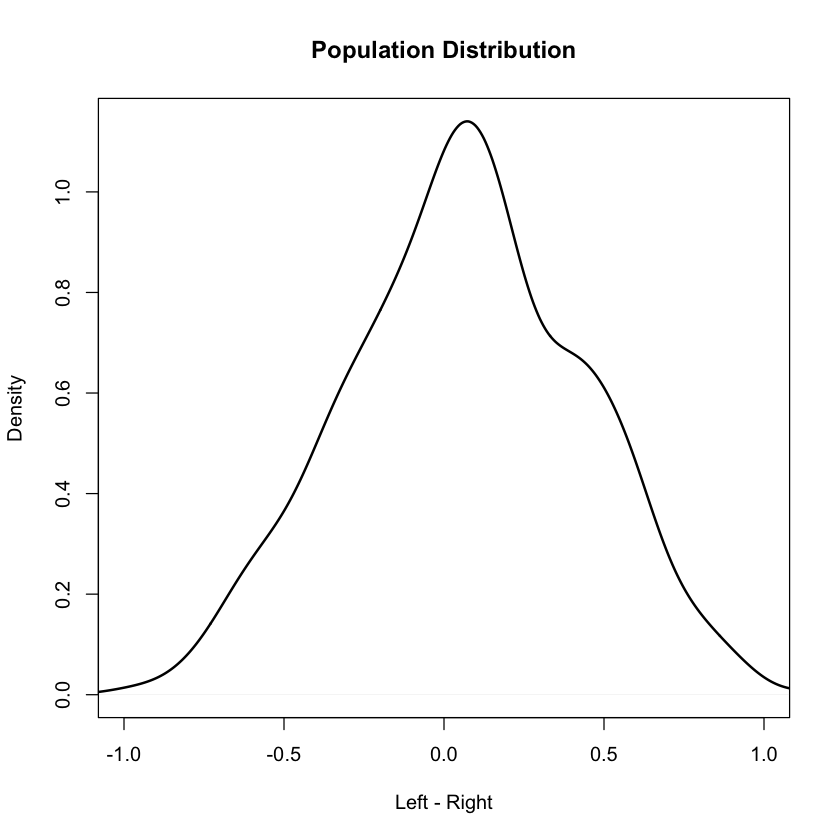

In [63]:
voters <- na.omit(result$respondents)
plot(density(voters[,3]), main="Population Distribution",
     xlab="Left - Right", xlim=c(-1,1), lwd=2)

<img src="figures/cap3.11.png" width=600 />

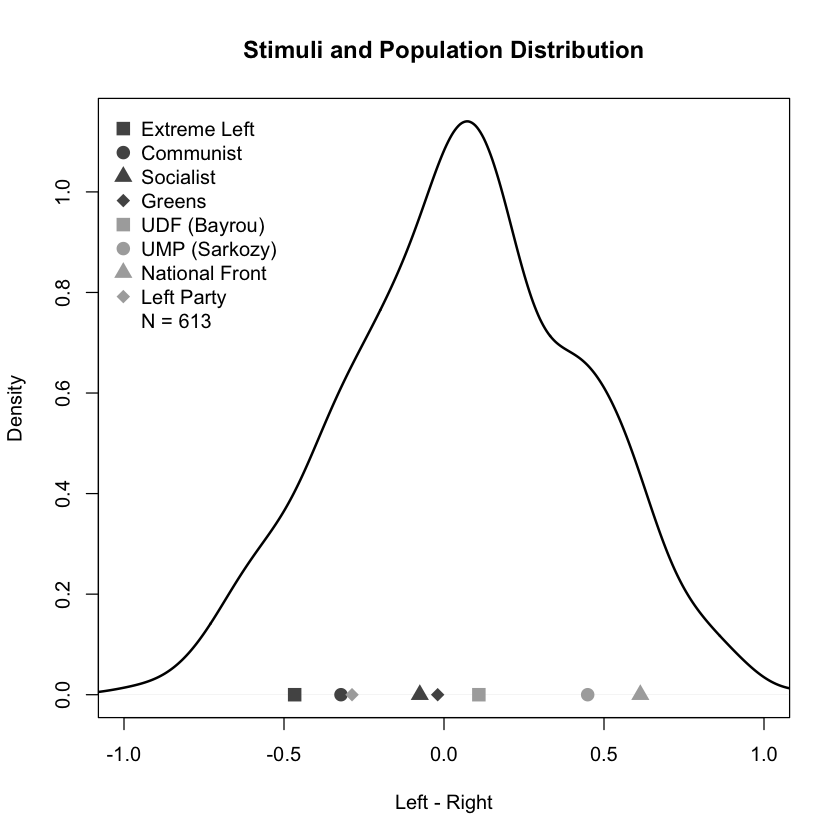

In [64]:
parties <- na.omit(result$stimuli)
party.names <- colnames(franceEES2009)[-1]
total.n <- nrow(voters) + length(parties)
cols <- c("gray33", "gray67")
plot(density(voters[,3]), main="Stimuli and Population Distribution",
     xlab="Left - Right", xlim=c(-1,1), lwd=2)
points(parties, rep(0, length(parties)), pch=rep(15:18, 2),
       col=rep(cols, each=4), cex=1.5)
legend("topleft", c(party.names, paste("N = ", total.n, sep="")),
       pch=c(rep(15:18, 2), NA), col=c(rep(cols, each=4), NA),
       pt.cex=1.5, inset=.01, bty="n")

<img src="figures/cap3.12.png" width=600 />

In [66]:
positive.voters <- voters[,3][voters[,5] > 0]

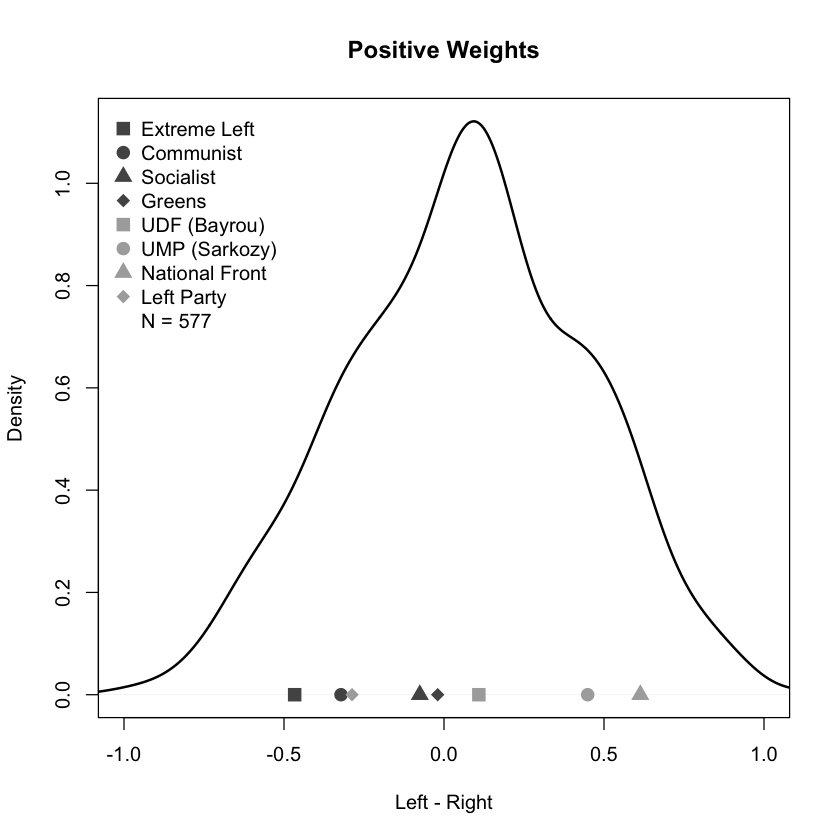

In [67]:
cols <- c("gray33", "gray67")
total.n <- length(positive.voters)
plot(density(positive.voters), main="Positive Weights",
     xlab="Left - Right", xlim=c(-1,1), lwd=2)
points(parties, rep(0, length(parties)), pch=rep(15:18, 2),
       col=rep(cols, each=4), cex=1.5)
legend("topleft", c(party.names, paste("N = ", total.n, sep="")),
       pch=c(rep(15:18, 2), NA), col=c(rep(cols, each=4), NA),
       pt.cex=1.5, inset=.01, bty="n")

<img src="figures/cap3.13.png" width=600 />

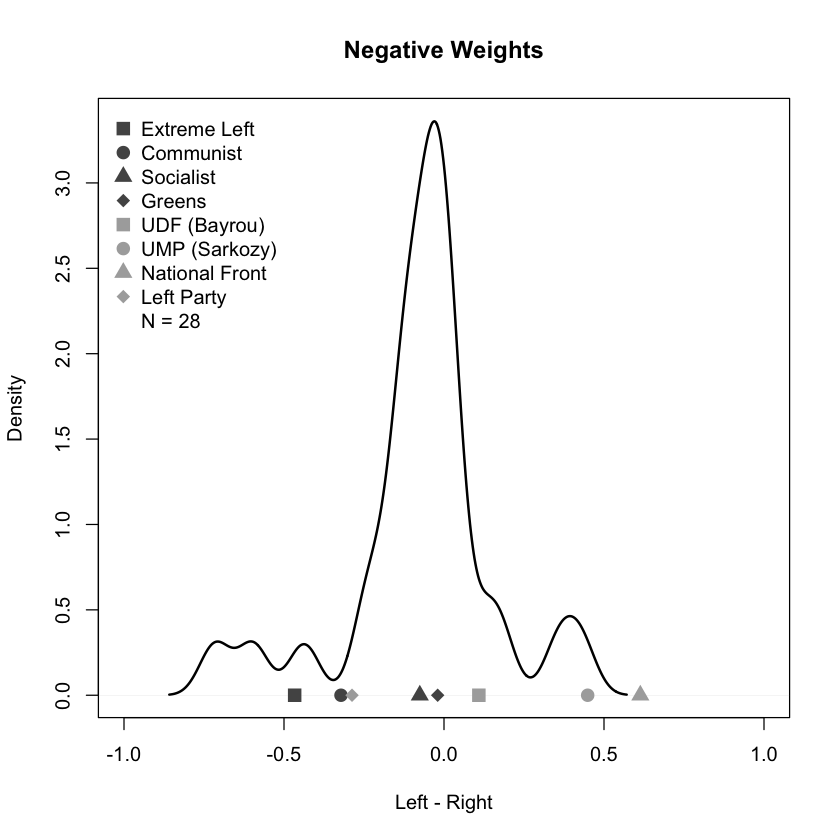

In [11]:
negative.voters <- voters[,3][voters[,5] == 0]
cols <- c("gray33", "gray67")
total.n <- length(negative.voters)
plot(density(negative.voters), main="Negative Weights",
     xlab="Left - Right", xlim=c(-1,1), lwd=2)
points(parties, rep(0, length(parties)), pch=rep(15:18, 2),
       col=rep(cols, each=4), cex=1.5)
legend("topleft", c(party.names, paste("N = ", total.n, sep="")),
       pch=c(rep(15:18, 2), NA), col=c(rep(cols, each=4), NA),
       pt.cex=1.5, inset=.01, bty="n")

<img src="figures/cap3.14.png" width=600 />

## 3.1.3 Example 2: 1968 American National Election Study Urban Unrest and Vietnam War Scales

In [12]:
load("data/nes1968_urbanunrest.Rda")

In [13]:
T <- as.matrix(nes1968_urbanunrest[,-1])
result <- aldmck(T, polarity=2, respondent=5,
                 missing=c(8,9), verbose=FALSE)
summary(result)



SUMMARY OF ALDRICH-MCKELVEY OBJECT
----------------------------------

Number of Stimuli: 4
Number of Respondents Scaled: 1191
Number of Respondents (Positive Weights): 1110
Number of Respondents (Negative Weights): 81
Reduction of normalized variance of perceptions: 0.09 

         Location
Humphrey   -0.428
Johnson    -0.399
Nixon       0.015
Wallace     0.811




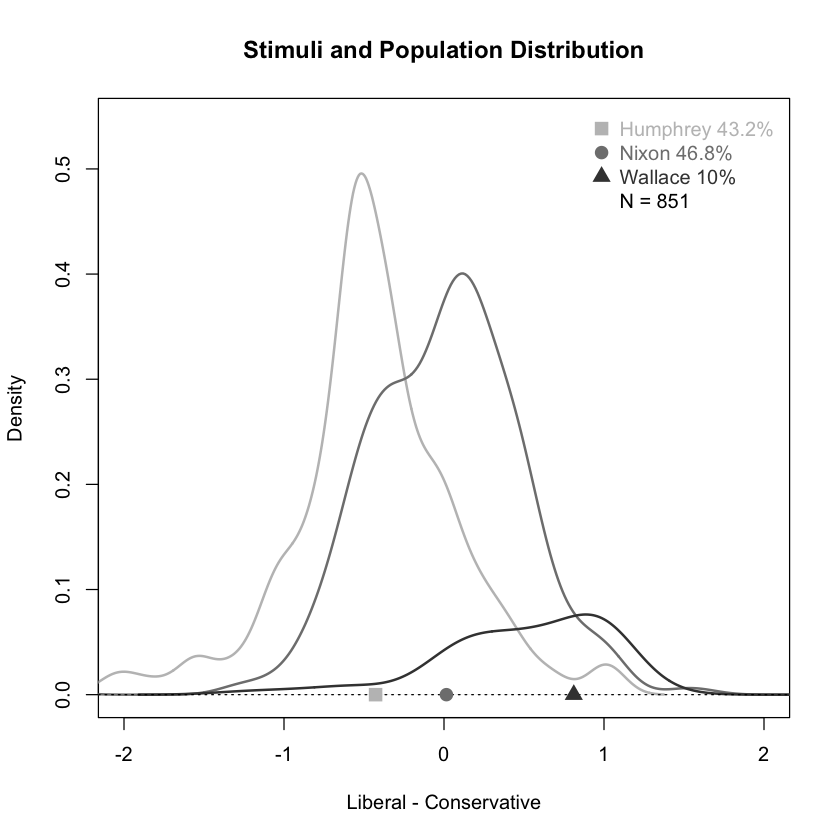

In [14]:
vote <- nes1968_urbanunrest[,1]
voters <- lapply(c(3,5,6), function(x) result$respondents$idealpt[which(result$respondent$weight > 0 & vote == x)])
shares <- sapply(voters, function(x)length(x)/sum(sapply(voters, length)))
dens <- lapply(voters, density)
rescale.dens <- function(x,scale){x$y <- x$y*scale; x}
dens <- lapply(1:length(dens), function(x) rescale.dens(dens[[x]], shares[x]))
ymax <- 1.1*max(sapply(dens, function(x) max(x$y)))
plot(dens[[1]], main="Stimuli and Population Distribution",
     xlab="Liberal - Conservative", ylab="Density",
     xlim=c(-2.0,2.0), ylim=c(0,ymax), type="n")
cols <- c("gray75", "gray50", "gray25")
invisible(sapply(1:length(dens), function(x) lines(dens[[x]], lwd=2,col=cols[x])))
abline(h=0, lty=3)
points(result$stimuli[2:4], rep(0,3), pch=15:17, col=cols, cex=1.5)
cands <- c("Humphrey", "Nixon", "Wallace")
ltext <- c(paste(cands, " ", 100.0*round(shares, 3), "%", sep=""),
           paste("N = ", sum(sapply(voters, length)), sep=""))
legend("topright", ltext, pch = c(15:17,NA), col = c(cols, NA),
       pt.cex = 1.5, text.col=c(cols, "black"), inset=.01, bty="n",
       border=NA)

<img src="figures/cap3.15.png" width=600 />

In [15]:
load("data/nes1968_vietnam.Rda")

In [16]:
TT <- as.matrix(nes1968_vietnam[,-1])
result <- aldmck(TT, polarity=2, respondent=5,missing=c(8,9), verbose=FALSE)
summary(result)



SUMMARY OF ALDRICH-MCKELVEY OBJECT
----------------------------------

Number of Stimuli: 4
Number of Respondents Scaled: 1031
Number of Respondents (Positive Weights): 800
Number of Respondents (Negative Weights): 231
Reduction of normalized variance of perceptions: 0.19 

         Location
Humphrey   -0.436
Johnson    -0.330
Nixon      -0.068
Wallace     0.834




<img src="figures/cap3.16.png" width=600 />

## 3.1.4 Estimating Bootstrapped Standard Errors for Aldrich-McKelveyScaling

In [18]:
library(boot)

In [19]:
boot.fun <- function(data, inds){
    assign(".inds", inds, envir=.GlobalEnv)
    out <- aldmck(data[.inds,], polarity=2, respondent=1,
                  missing=c(77,88,99), verbose=FALSE)
    remove(".inds", envir=.GlobalEnv)
    out$stimuli
}

In [20]:
result <- aldmck(franceEES2009, polarity=2, respondent=1, 
                missing=c(77,88,89), verbose=FALSE)

In [21]:
boot.aldmck <- boot(franceEES2009, boot.fun, R=100)

In [22]:
boot.out <- cbind(result$stimuli, apply(boot.aldmck$t, 2, sd))

In [23]:
boot.out <- cbind(boot.out, boot.out[,1] - 1.96*boot.out[,2],
                  boot.out[,1] + 1.96*boot.out[,2])

In [24]:
colnames(boot.out) <- c("point","se","lower","upper")

In [25]:
boot.out <- boot.out[order(boot.out[,1]), ]

In [26]:
library(lattice)


Attaching package: ‘lattice’

The following object is masked from ‘package:boot’:

    melanoma



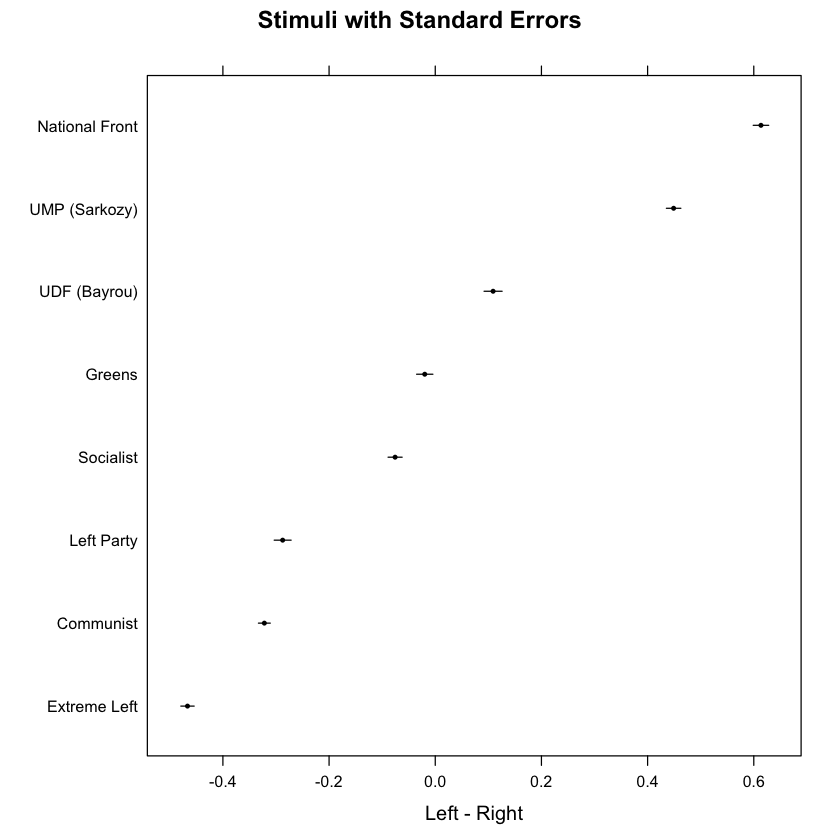

In [27]:
dotplot(~boot.out[,1], main="Stimuli with Standard Errors",
        xlab="Left - Right",
        panel = function(x, y, subscripts, lower, upper){
            panel.points(x, y, pch=16, col="black", cex=.5)
            panel.segments(boot.out[,3], y, boot.out[,4], y)})

<img src="figures/cap3.17.png" width=600 />

## 3.1.5 Bayesian Aldrich-McKelvey Scaling

In [ ]:
BAM_JAGScode.bug:

In [ ]:
model{
for(i in 1:N){ ##loop through respondents
for(j in 1:q){ ##loop through stimuli
z[i,j] ~ dnorm(mu[i,j],tau[i,j])
mu[i,j] <-a[i] + b[i]*zhat[j]
tau[i,j] <-taui[i] * tauj[j] ##respondent and stimuli
}} ##precision terms
for(i in 1:N){
a[i] ~ dunif(-100,100) ##uniform priors on alpha
b[i] ~ dunif(-100,100) ##uniform priors on beta
taui[i] ~ dgamma(ga,gb) ##priors on variance (respondents) }
ga ~ dgamma(.1,.1) ##hyperpriors for taui
gb ~ dgamma(.1,.1) ##hyperpriors for taui
for(j in 1:q){
tauj[j] ~ dgamma(.1,.1) ##priors on variance (stimuli) zhatstar[j] ~ dnorm(0,1) ## priors on zhat (norm. constraint) zhat[j] <-(zhatstar[j]-mean(zhatstar[]))/sd(zhatstar[])
}}

In [28]:
library(rjags)

Loading required package: coda
Linked to JAGS 3.4.0
Loaded modules: basemod,bugs


In [29]:
load("data/franceEES2009.Rda")

In [30]:
MLE_result <- aldmck(franceEES2009, polarity=2, respondent=1,
                     missing=c(77,88,89), verbose=FALSE)

In [31]:
franceEES2009[franceEES2009==77 | franceEES2009==88 |
              franceEES2009==89] <- NA

In [32]:
franceEES2009 <- franceEES2009 - 5

In [33]:
self <- franceEES2009[,1]

In [34]:
franceEES2009 <- franceEES2009[,-1]

In [35]:
self <- self[rowSums(!is.na(franceEES2009)) >= 5]

In [36]:
franceEES2009 <- franceEES2009[rowSums(!is.na(franceEES2009)) >= 5,]

In [37]:
N <- nrow(franceEES2009)

In [38]:
q <- ncol(franceEES2009)

In [39]:
z <- franceEES2009

In [40]:
inits <- function() {list (zhatstar=MLE_result$stimuli +
                           rnorm(length(MLE_result$stimuli), 0, 1))}

In [41]:
france.sim <- jags.model(
    'data/BAM_JAGScode.bug',
    data = list('z' = z, 'q' = q, 'N' = N),
    inits = inits, n.chains = 2, n.adapt = 10000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 31848

Initializing model



In [42]:
zhat <- coda.samples(france.sim, 'zhat', 5000, thin=1)

In [43]:
a <- coda.samples(france.sim, 'a', 5000, thin=1)

In [44]:
b <- coda.samples(france.sim, 'b', 5000, thin=1)

In [45]:
bayes.out <- cbind(summary(zhat)$statistics[,1:2],
                   summary(zhat)$quantiles[,1], summary(zhat)$quantiles[,5])

In [46]:
rownames(bayes.out) <- colnames(z)

In [47]:
colnames(bayes.out) <- c("mean", "se", "lower", "upper")

In [48]:
print(round(bayes.out, 3))

                 mean    se  lower  upper
Extreme Left   -0.902 0.002 -0.907 -0.900
Communist       0.902 0.002  0.900  0.907
Socialist       1.145 0.344  0.791  1.600
Greens          1.228 0.443  0.771  1.786
UDF (Bayrou)    1.528 0.796  0.712  2.459
UMP (Sarkozy)   2.159 1.545  0.581  3.895
National Front  2.543 1.991  0.512  4.772
Left Party      0.688 0.202  0.382  0.892


<img src="figures/eq3.10.png" width=600 />

In [49]:
a.samples <- do.call("rbind", a)

In [50]:
b.samples <- do.call("rbind", b)

In [51]:
nsamp <- nrow(a.samples)

In [52]:
nresp <- ncol(a.samples)

In [53]:
idealpt <- rep(NA, nsamp*nresp)

In [54]:
dim(idealpt) <- c(nsamp, nresp)

In [55]:
for (i in 1:nresp){
    for (m in 1:nsamp){
        idealpt[m,i] <- ((self[i] - a.samples[m,i]) / b.samples[m,i])
    }}

In [ ]:
idealpt.percentiles <- rep(NA, nresp*3)

In [ ]:
dim(idealpt.percentiles) <- c(nresp, 3)

In [ ]:
colnames(idealpt.percentiles) <- c("2.5%", "50%", "97.5%")

In [ ]:
for (i in 1:nresp){
    idealpt.percentiles[i,] <- quantile(idealpt[,i],
    probs=c(0.025, 0.5, 0.975), na.rm=TRUE)
}

In [ ]:
zhat.samples <- do.call("rbind", zhat)

In [ ]:
colnames(zhat.samples) <- colnames(z)

In [ ]:
soc_samples <- zhat.samples[,3]

In [ ]:
greens_samples <- zhat.samples[,4]

In [ ]:
nsims <- 100000

In [ ]:
x1 <- soc_samples[sample(1:nrow(zhat.samples), nsims, replace=TRUE)]

In [ ]:
x2 <- greens_samples[sample(1:nrow(zhat.samples), nsims, replace=TRUE)]

In [ ]:
flip.order <- NULL

In [ ]:
for (i in 1:nsims){
    flip.order[i] <- x1[i] > x2[i]
}

In [ ]:
p.wrong.order <- length(flip.order[flip.order=="TRUE"]) / nsims

In [ ]:
print(p.wrong.order)

In [ ]:
plot(density(soc_samples), main="Posterior Densities",
     xlab="Left - Right", xlim=c(-0.3,0), lwd=2)
lines(density(greens_samples), lty=2, lwd=2)
text(mean(soc_samples), -0.5, "Socialist Party")
text(mean(greens_samples), -0.5, "Greens")

<img src="figures/cap3.19.png" width=600 />

In [ ]:
plot(MLE_result$stimuli, bayes.out[,1], main="Stimuli Locations",
     xlab="ML A-M Result", ylab="Bayesian A-M Result", pch=16)
text(MLE_result$stimuli,bayes.out[,1], colnames(z),
     pos=c(4,4,4,4,4,2,2,4), offset=0.30)
abline(lm(bayes.out[,1] ~ MLE_result$stimuli))
text(-0.3, 1.5, paste("r = ", round(cor(MLE_result$stimuli,
    bayes.out[,1]), 3)))

## 3.1.6 Comparing Aldrich-McKelvey Standard Errors

In [ ]:
samples <- zhat.samples[,match(names(MLE_result$stimuli),
        colnames(zhat.samples))]

In [ ]:
samples.scale <- apply(zhat.samples, 1, scale)

In [ ]:
boot.scale <- apply(boot.aldmck$t, 1, scale)

In [ ]:
bayes.se <- apply(samples.scale, 1, sd)

In [ ]:
boot.se <- apply(boot.scale, 1, sd)

In [ ]:
plot(boot.se, bayes.se, main="Stimuli Standard Errors",
     xlab="ML A-M Bootstrapped SE", ylab="Bayesian A-M SE",
     xlim=c(0.01, 0.022), ylim=c(0.01, 0.022), pch=16, asp=1)
text(boot.se, bayes.se, colnames(z), pos=c(3,4,2,3,1,2,4,3),offset=0.35)
abline(a=0, b=1)
text(0.01, 0.021, paste("r = ", round(cor(boot.se, bayes.se), 3)))

<img src="figures/cap3.20.png" width=600 />

<img src="figures/cap3.18.png" width=600 />

In [ ]:
load("data/franceEES2009.Rda")

In [ ]:
T <- cbind(MLE_result$respondents[,1:2], franceEES2009[,2:9])

In [ ]:
T <- na.omit(T)

In [ ]:
alpha <- T[,1]

In [ ]:
beta <- T[,2]

In [ ]:
z <- T[,3:ncol(T)]

In [ ]:
zhat <- MLE_result$stimuli

In [ ]:
sigmaj <- rep(0,length(zhat))

In [ ]:
for (j in 1:length(zhat)){
    for (i in 1:length(alpha)){
        sigmaj[j] <- sigmaj[j]+((alpha[i] 
                                + beta[i]*zhat[j]) 
                                - z[i,j])^2
}}

In [ ]:
se.comparison <- rbind(boot.se, bayes.se ,sigmaj)

In [ ]:
rownames(se.comparison) <- c("ML Bootstrap SE", "Bayesian SE",
                             "Aldrich-McKelvey SE")

In [ ]:
colnames(se.comparison) <- names(MLE_result$stimuli)

In [ ]:
print(se.comparison)

<img src="figures/cap3.21.png" width=600 />

# 3.2 Basic Space Scaling: The blackbox Function

* 3.2.1 Example 1: 2000 Convention Delegate Study 
* 3.2.2 Example 2: 2010 Swedish Parliamentary Candidate Survey
* 3.2.3 Estimating Bootstrapped Standard Errors for Black BoxScaling

## 3.2.1 Example 1: 2000 Convention Delegate Study 

## 3.2.2 Example 2: 2010 Swedish Parliamentary Candidate Survey

## 3.2.3 Estimating Bootstrapped Standard Errors for Black BoxScaling

# 3.3 Basic Space Scaling: The blackbox transpose Function

* 3.3.1 Example 1: 2000 and 2006 Comparative Study of Electoral Systems (Mexican Modules)
* 3.3.2 Estimating Bootstrapped Standard Errors for Black Box Transpose Scaling
* 3.3.3 Using the blackbox transpose Function on Datasets with Large Numbers of Respondents

## 3.3.1 Example 1: 2000 and 2006 Comparative Study of Electoral Systems (Mexican Modules)

## 3.3.2 Estimating Bootstrapped Standard Errors for Black Box Transpose Scaling

## 3.3.3 Using the blackbox transpose Function on Datasets with Large Numbers of Respondents

# 3.4 Anchoring Vignettes

# 3.5 Conclusion

# References

In [17]:
# data - http://voteview.com/asmcjr_chapter_3.htm